In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from sklearn.decomposition import PCA
from ast import literal_eval
from collections import Counter

In [44]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile.csv")
user_profile.head()

,Unnamed: 0,event_source.hash,ONNET_OUTGOING_Categorical,ONNET_OUTGOING_Scaled,ONNET_OUTGOING_Outlier,ONNET_INCOMING_Categorical,ONNET_INCOMING_Scaled,ONNET_INCOMING_Outlier,OFFNET_OUTGOING_Categorical,OFFNET_OUTGOING_Scaled,...,ONNET_Overall_Categorical,OFFNET_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical,Play_Type,Play_Usage,Voice_Packages,Other_Packages,Household_Types,Having_Insurance
0,0,00221451f705ebe26051158bb14f567a,LOW,0.009321,NO,LOW,0.017514,NO,LOW,0.048813,...,LOW,LOW,NO,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO
1,1,002fb47f60400713c854b0f69ff78c0a,LOW,0.051339,NO,LOW,0.056319,NO,LOW,0.053424,...,LOW,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO
2,2,00567a4a3c474aca1ce5cd6570648932,LOW,0.002404,NO,LOW,0.001374,NO,LOW,0.003606,...,LOW,LOW,NO,LOW,TRIPLE_PLAY,"['VOICE_LOW', 'BB_MEDIUM', 'TV_MEDIUM']",NO,NO,NO,NO
3,3,00724ae2470df1ed0fe919800d02517d,LOW,0.003140,NO,LOW,0.002747,NO,LOW,0.004808,...,LOW,LOW,NO,LOW,DOUBLE_PLAY,"['VOICE_LOW', 'BB_LOW', 'TV_NO']",NO,NO,NO,NO
4,4,007400db8afa996e788d23986739f3db,LOW,0.025755,NO,LOW,0.017857,NO,LOW,0.039197,...,LOW,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO


In [45]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3307 non-null   int64  
 1   event_source.hash            3307 non-null   object 
 2   ONNET_OUTGOING_Categorical   3307 non-null   object 
 3   ONNET_OUTGOING_Scaled        3307 non-null   float64
 4   ONNET_OUTGOING_Outlier       3307 non-null   object 
 5   ONNET_INCOMING_Categorical   3307 non-null   object 
 6   ONNET_INCOMING_Scaled        3307 non-null   float64
 7   ONNET_INCOMING_Outlier       3307 non-null   object 
 8   OFFNET_OUTGOING_Categorical  3307 non-null   object 
 9   OFFNET_OUTGOING_Scaled       3307 non-null   float64
 10  OFFNET_OUTGOING_Outlier      3307 non-null   object 
 11  OFFNET_INCOMING_Categorical  3307 non-null   object 
 12  OFFNET_INCOMING_Scaled       3307 non-null   float64
 13  OFFNET_INCOMING_Ou

## Scaling Categorical Features

In [46]:
data = user_profile.iloc[:,[3,6,9,12,15,18,22,24,25,30,34,35]]
data

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Location_Identifier,Play_Type,Household_Types,Having_Insurance
0,0.009321,0.017514,0.048813,0.085835,0.000000,0.000000,0.0000,0.000000,MSAG5200-ISLMX-NODE5391821,SINGLE_PLAY,NO,NO
1,0.051339,0.056319,0.053424,0.079989,0.014423,0.000000,0.0000,0.000000,MSAG5200-ISLND-PHG-NODE500241,SINGLE_PLAY,NO,NO
2,0.002404,0.001374,0.003606,0.002404,0.000000,0.000000,0.6500,0.619792,MSAG5200-ISLIDH-KGW-NODE6194491,TRIPLE_PLAY,NO,NO
3,0.003140,0.002747,0.004808,0.010817,0.000000,0.000000,0.0000,0.031250,MSAG5200-ISLMT-AVR-NODE467161,DOUBLE_PLAY,NO,NO
4,0.025755,0.017857,0.039197,0.081363,0.043269,0.004808,0.0000,0.000000,ZXDSL9806H-ISLKL-PRC-NODE482361,SINGLE_PLAY,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
3302,0.053964,0.080529,0.018029,0.011332,0.006410,0.000000,0.0000,0.000000,MSAG5200-ISLMV-GDM-NODE482491,SINGLE_PLAY,NO,NO
3303,0.227924,0.173935,0.334012,0.147142,0.000000,0.000000,0.0000,0.000000,MSAG5200-ISLWKN-SWP-NODE473481,SINGLE_PLAY,NO,NO
3304,0.002943,0.005495,0.001202,0.012019,0.000000,0.000000,0.0000,0.013889,C300MTP-NODE8700911,DOUBLE_PLAY,NO,NO
3305,0.213108,0.203984,0.196281,0.135744,0.110577,0.272436,0.0000,0.000000,MSAG5200-ISLMV-GDM-NODE482491,SINGLE_PLAY,NO,NO


In [47]:
data["Location_Identifier"] = data["Location_Identifier"].astype("category")
data["Location_Identifier_Scaled"] = data["Location_Identifier"].cat.codes

<ipython-input-47-697c3f11bb61>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-697c3f11bb61>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
data["Play_Type"] = data["Play_Type"].astype("category")
data["Play_Type_Scaled"] = data["Play_Type"].cat.codes

<ipython-input-48-ea4fa4ac82c6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-ea4fa4ac82c6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
data["Household_Types"] = data["Household_Types"].astype("category")
data["Household_Types_Scaled"] = data["Household_Types"].cat.codes

<ipython-input-49-7a2cb27fc9e8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-7a2cb27fc9e8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
data["Having_Insurance"] = data["Having_Insurance"].astype("category")
data["Having_Insurance_Scaled"] = data["Having_Insurance"].cat.codes

<ipython-input-50-2aecd2994313>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-2aecd2994313>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
scaler = MinMaxScaler()
data["Location_Identifier_Scaled"] = scaler.fit_transform(data["Location_Identifier_Scaled"].values.reshape(-1,1))
data["Play_Type_Scaled"] = scaler.fit_transform(data["Play_Type_Scaled"].values.reshape(-1,1))
data["Household_Types_Scaled"] = scaler.fit_transform(data["Household_Types_Scaled"].values.reshape(-1,1))
data["Having_Insurance_Scaled"] = scaler.fit_transform(data["Having_Insurance_Scaled"].values.reshape(-1,1))

<ipython-input-51-fcce974be2d7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-fcce974be2d7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-fcce974be2d7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-fcce974

In [52]:
data.drop(["Location_Identifier","Play_Type","Household_Types","Having_Insurance"],axis=1,inplace=True)

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Pre-processed dataset for clustering

In [53]:
data

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Location_Identifier_Scaled,Play_Type_Scaled,Household_Types_Scaled,Having_Insurance_Scaled
0,0.009321,0.017514,0.048813,0.085835,0.000000,0.000000,0.0000,0.000000,0.500000,0.5,0.0,0.0
1,0.051339,0.056319,0.053424,0.079989,0.014423,0.000000,0.0000,0.000000,0.520833,0.5,0.0,0.0
2,0.002404,0.001374,0.003606,0.002404,0.000000,0.000000,0.6500,0.619792,0.333333,1.0,0.0,0.0
3,0.003140,0.002747,0.004808,0.010817,0.000000,0.000000,0.0000,0.031250,0.458333,0.0,0.0,0.0
4,0.025755,0.017857,0.039197,0.081363,0.043269,0.004808,0.0000,0.000000,1.000000,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3302,0.053964,0.080529,0.018029,0.011332,0.006410,0.000000,0.0000,0.000000,0.479167,0.5,0.0,0.0
3303,0.227924,0.173935,0.334012,0.147142,0.000000,0.000000,0.0000,0.000000,0.729167,0.5,0.0,0.0
3304,0.002943,0.005495,0.001202,0.012019,0.000000,0.000000,0.0000,0.013889,0.125000,0.0,0.0,0.0
3305,0.213108,0.203984,0.196281,0.135744,0.110577,0.272436,0.0000,0.000000,0.479167,0.5,0.0,0.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ONNET_OUTGOING_Scaled       3307 non-null   float64
 1   ONNET_INCOMING_Scaled       3307 non-null   float64
 2   OFFNET_OUTGOING_Scaled      3307 non-null   float64
 3   OFFNET_INCOMING_Scaled      3307 non-null   float64
 4   IDD_INCOMING_Scaled         3307 non-null   float64
 5   IDD_OUTGOING_Scaled         3307 non-null   float64
 6   PEO_TV_Scaled               3307 non-null   float64
 7   BB_Scaled                   3307 non-null   float64
 8   Location_Identifier_Scaled  3307 non-null   float64
 9   Play_Type_Scaled            3307 non-null   float64
 10  Household_Types_Scaled      3307 non-null   float64
 11  Having_Insurance_Scaled     3307 non-null   float64
dtypes: float64(12)
memory usage: 310.2 KB


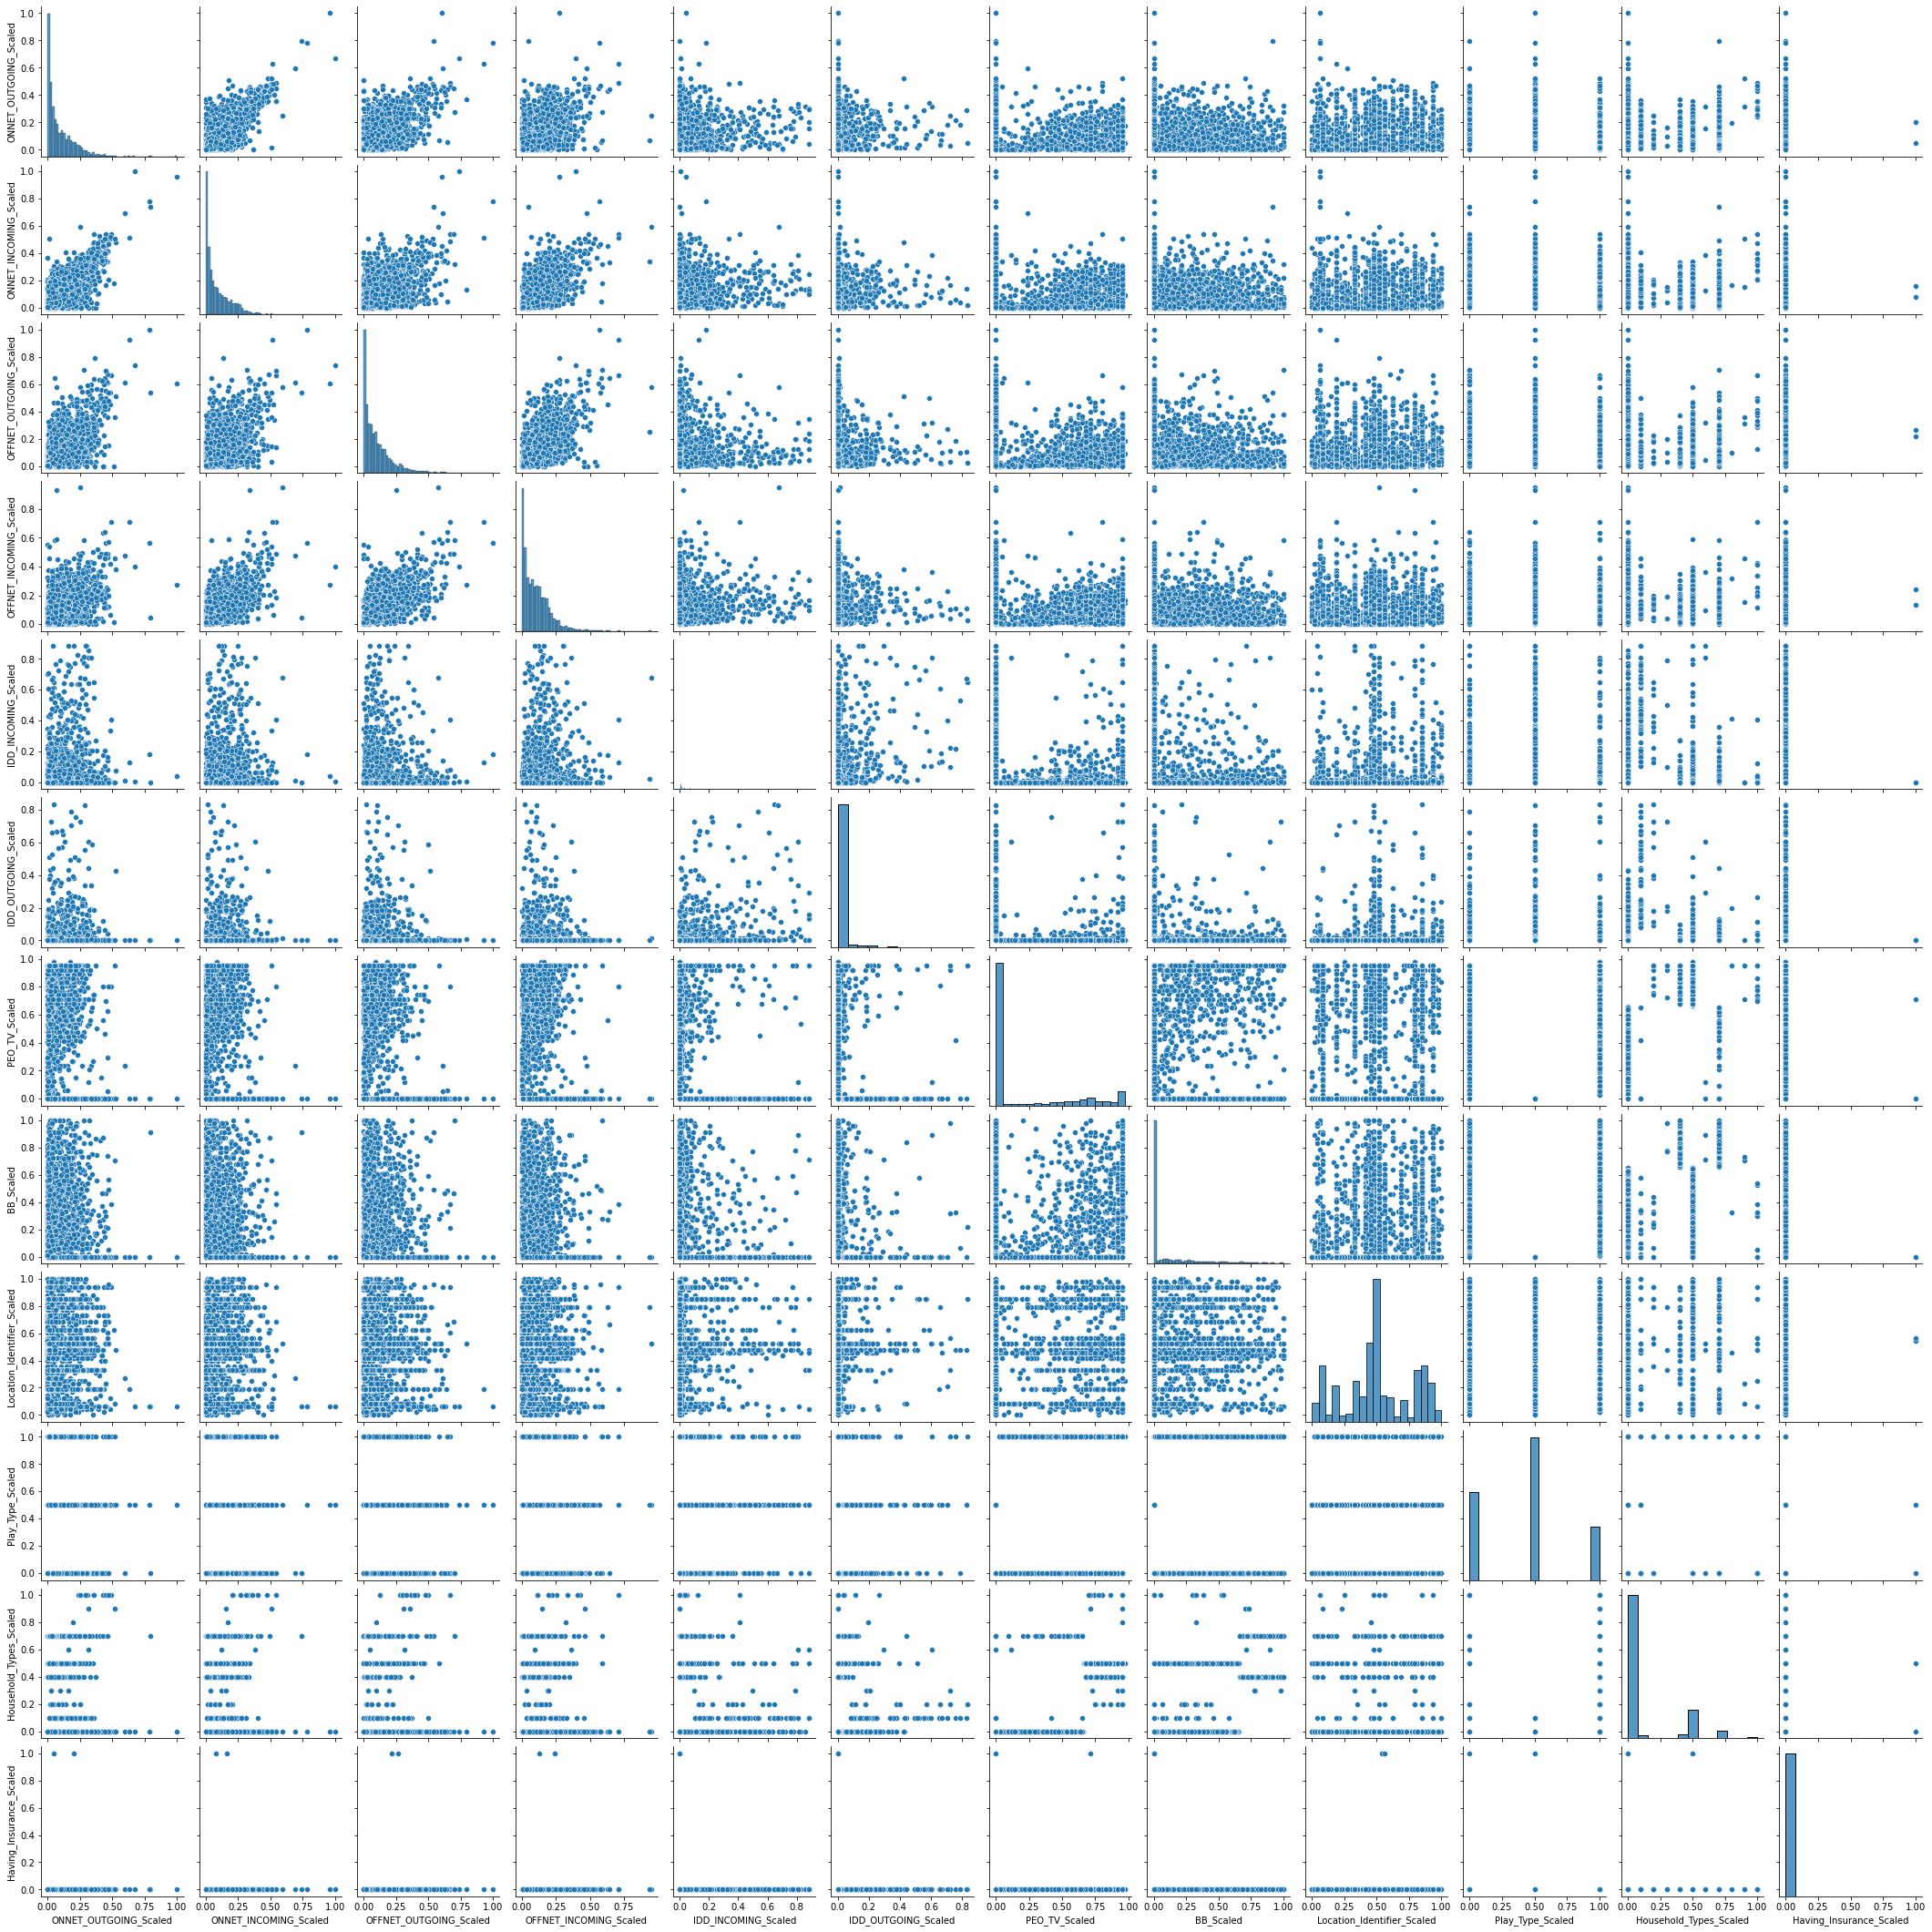

In [55]:
sns.pairplot(data)

In [56]:
data.describe()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Location_Identifier_Scaled,Play_Type_Scaled,Household_Types_Scaled,Having_Insurance_Scaled
count,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000,3307.000000
mean,0.095437,0.093719,0.103776,0.103951,0.037109,0.015058,0.206001,0.132235,0.509966,0.438615,0.118022,0.000605
std,0.102268,0.103917,0.114072,0.098634,0.110553,0.067854,0.336605,0.234090,0.259462,0.347203,0.225912,0.024589
min,0.001202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.017624,0.014595,0.019599,0.023801,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
50%,0.056907,0.055632,0.068779,0.083374,0.000000,0.000000,0.000000,0.000000,0.479167,0.500000,0.000000,0.000000
75%,0.147321,0.144059,0.148106,0.156299,0.012821,0.000000,0.450000,0.178819,0.729167,0.500000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.948718,0.884615,0.833333,0.975000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlations

In [57]:
data.corr()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Location_Identifier_Scaled,Play_Type_Scaled,Household_Types_Scaled,Having_Insurance_Scaled
ONNET_OUTGOING_Scaled,1.000000,0.795633,0.607362,0.516097,0.183989,0.118292,0.019393,0.068771,-0.024907,-0.021946,0.070700,0.007469
ONNET_INCOMING_Scaled,0.795633,1.000000,0.545856,0.674679,0.207059,0.084681,0.025536,0.041932,-0.045798,-0.022746,0.061759,0.006187
OFFNET_OUTGOING_Scaled,0.607362,0.545856,1.000000,0.685382,0.091514,0.062090,0.000360,0.031320,-0.026244,-0.011144,0.036458,0.029649
OFFNET_INCOMING_Scaled,0.516097,0.674679,0.685382,1.000000,0.199470,0.064653,0.065538,0.032423,-0.054757,0.020861,0.077450,0.020532
IDD_INCOMING_Scaled,0.183989,0.207059,0.091514,0.199470,1.000000,0.426043,-0.009997,0.026702,0.018645,-0.004393,0.018489,-0.008258
IDD_OUTGOING_Scaled,0.118292,0.084681,0.062090,0.064653,0.426043,1.000000,0.013381,0.015549,0.025885,0.012005,0.032845,-0.005460
PEO_TV_Scaled,0.019393,0.025536,0.000360,0.065538,-0.009997,0.013381,1.000000,0.318117,0.019001,0.339736,0.705067,0.010982
BB_Scaled,0.068771,0.041932,0.031320,0.032423,0.026702,0.015549,0.318117,1.000000,0.052526,0.159726,0.560908,-0.013898
Location_Identifier_Scaled,-0.024907,-0.045798,-0.026244,-0.054757,0.018645,0.025885,0.019001,0.052526,1.000000,-0.007967,0.023307,0.003994
Play_Type_Scaled,-0.021946,-0.022746,-0.011144,0.020861,-0.004393,0.012005,0.339736,0.159726,-0.007967,1.000000,0.165662,-0.013366


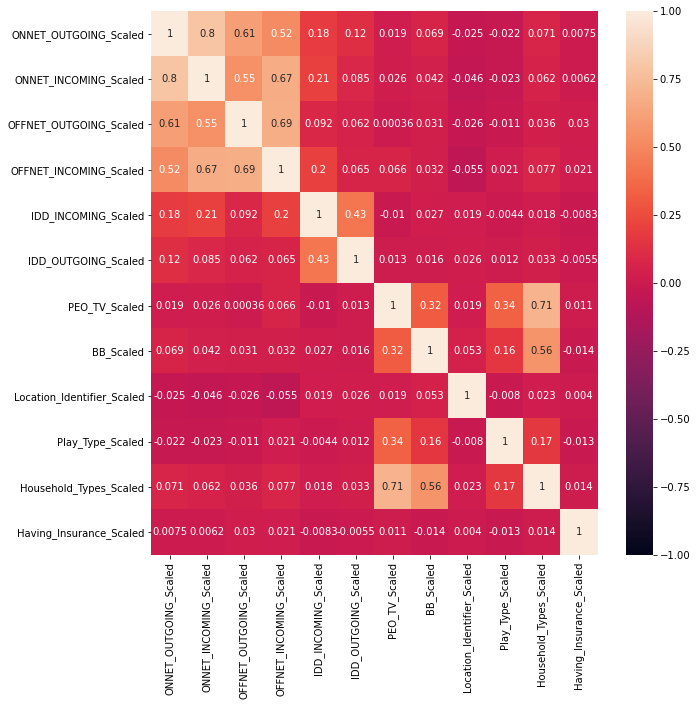

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

In [59]:
x= data.values

# Clustering Users with Scaled features

## Agglomerative Clustering and Dendrogram
- Hierarchical Clustering

In [60]:
result=shc.linkage(x, method="ward")

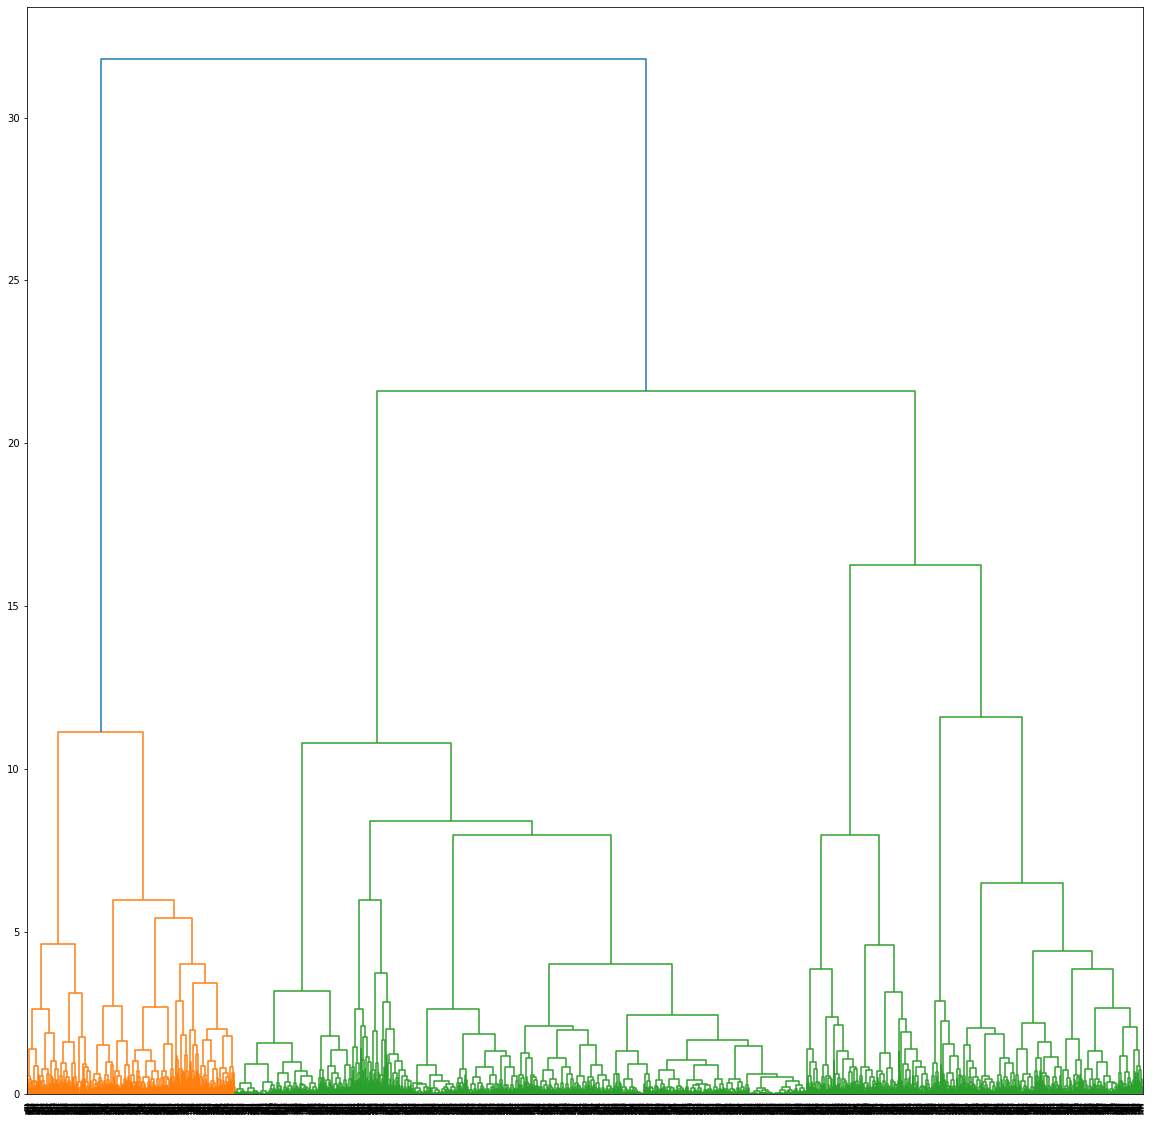

In [19]:
plt.figure(figsize=(20,20))
shc.dendrogram(result)
plt.show()

In [61]:
acl=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")

In [62]:
acl.fit(x)

AgglomerativeClustering(n_clusters=3)

In [63]:
# cluster labels
acl.labels_

array([2, 2, 1, ..., 0, 2, 0])

### User counts in each cluster

In [64]:
cluster_labels=[0,1,2]
dict(zip(cluster_labels,np.bincount(acl.labels_)))

{0: 997, 1: 616, 2: 1694}

# K-Means Clustering

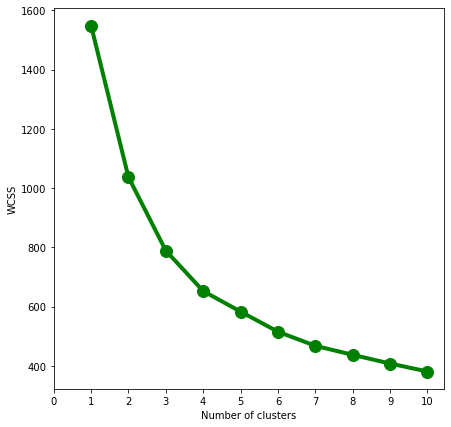

In [65]:
# find the optimal number of clusters using elbow method
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [66]:
# since elbow occured at 3, let's consider 3 clusters
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [67]:
y_clusters

array([0, 0, 1, ..., 2, 0, 2], dtype=int32)

In [68]:
model.labels_

array([0, 0, 1, ..., 2, 0, 2], dtype=int32)

In [69]:
cluster_labels=[1,0,2]
dict(zip(cluster_labels,np.bincount(model.labels_)))

{1: 1721, 0: 561, 2: 1025}

In [70]:
model.cluster_centers_

array([[ 9.03961202e-02,  8.94062358e-02,  1.02265968e-01,
         1.01677950e-01,  3.76029887e-02,  1.49808549e-02,
         6.11199884e-03,  3.89893634e-03,  4.92639938e-01,
         5.16850668e-01,  2.14991284e-03,  5.81057525e-04],
       [ 1.01772265e-01,  9.84374082e-02,  1.06370870e-01,
         1.14133051e-01,  3.70103752e-02,  1.73996755e-02,
         7.47860963e-01,  4.06444964e-01,  5.33719548e-01,
         1.00000000e+00,  3.78431373e-01,  2.05998413e-18],
       [ 1.00433530e-01,  9.83777808e-02,  1.04891378e-01,
         1.02194675e-01,  3.63320826e-02,  1.39071295e-02,
         2.45048780e-01,  1.97635501e-01,  5.26056911e-01,
        -2.99760217e-15,  1.70048780e-01,  9.75609756e-04]])

# Applying PCA for visualization purposes

### Find most approporiate no of components

In [71]:
pc=PCA(n_components=12) # 23
pc.fit(x)

PCA(n_components=12)

In [72]:
#How much variance,caputured individually
pc.explained_variance_

array([0.18561524, 0.09400597, 0.06741304, 0.04688629, 0.03244276,
       0.01361944, 0.012666  , 0.00628406, 0.00423541, 0.00326212,
       0.00140404, 0.00060313])

In [73]:
#How mucb variance, captured together
pc.explained_variance_ratio_.cumsum() 

array([0.39624334, 0.59692319, 0.74083362, 0.84092442, 0.91018182,
       0.93925601, 0.96629484, 0.97970978, 0.98875136, 0.99571519,
       0.99871247, 1.        ])

/home/chiran/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



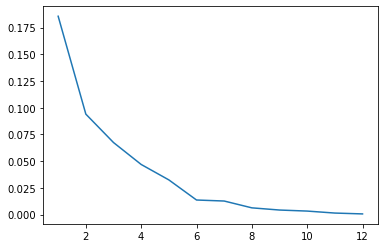

In [74]:
sns.lineplot(range(1,1+pc.explained_variance_.shape[0]),pc.explained_variance_)
plt.show()

### n=2 for 2D visualizations

In [75]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_2d = PCA(n_components=2)
pca_2d.fit(x)
reduced_data = pca_2d.fit_transform(x)
results_2d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_2d_df[['pca1','pca2']] = scaler.fit_transform(results_2d_df[['pca1','pca2']])

results = results_2d_df.values

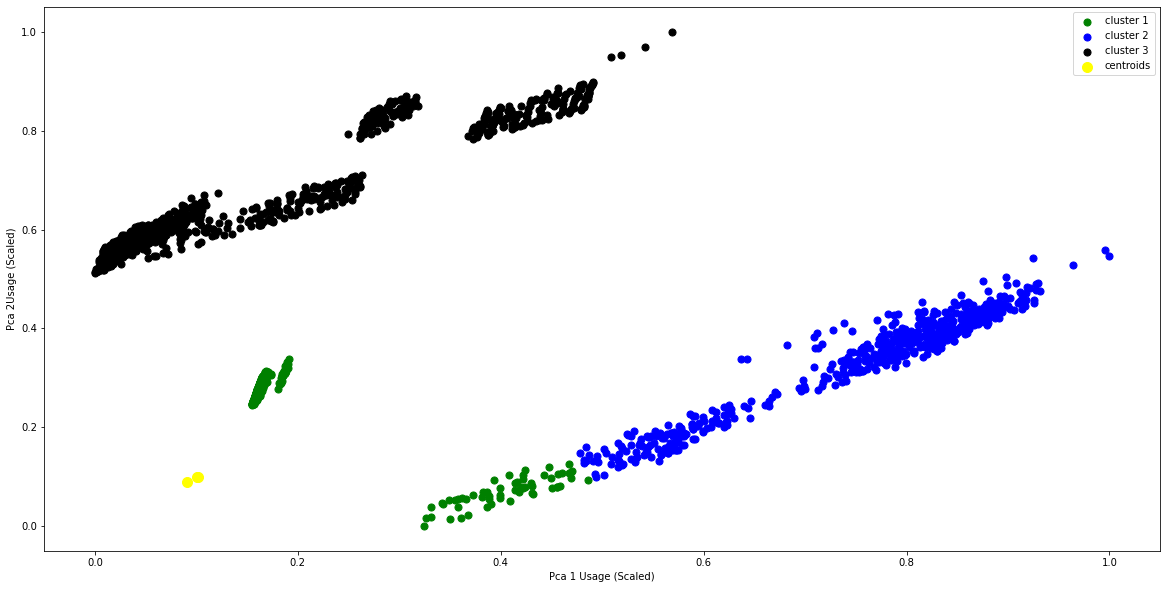

In [76]:
plt.figure(figsize = (20,10))
plt.scatter(results[y_clusters == 0,0],results[y_clusters == 0,1],s = 50, c = 'green', label = "cluster 1")
plt.scatter(results[y_clusters == 1,0],results[y_clusters == 1,1],s = 50, c = 'blue', label = "cluster 2")
plt.scatter(results[y_clusters == 2,0],results[y_clusters == 2,1],s = 50, c = 'black', label = "cluster 3")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Pca 1 Usage (Scaled)")
plt.ylabel("Pca 2Usage (Scaled)")
plt.legend()
plt.show()

### Using 3D visualization to visualize cluster densities more clearlity (n=3)

In [77]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_3d = PCA(n_components=3)
pca_3d.fit(x)
reduced_data = pca_3d.fit_transform(x)
results_3d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_3d_df[['pca1','pca2','pca3']] = scaler.fit_transform(results_3d_df[['pca1','pca2','pca3']])

results_3d = results_3d_df.values

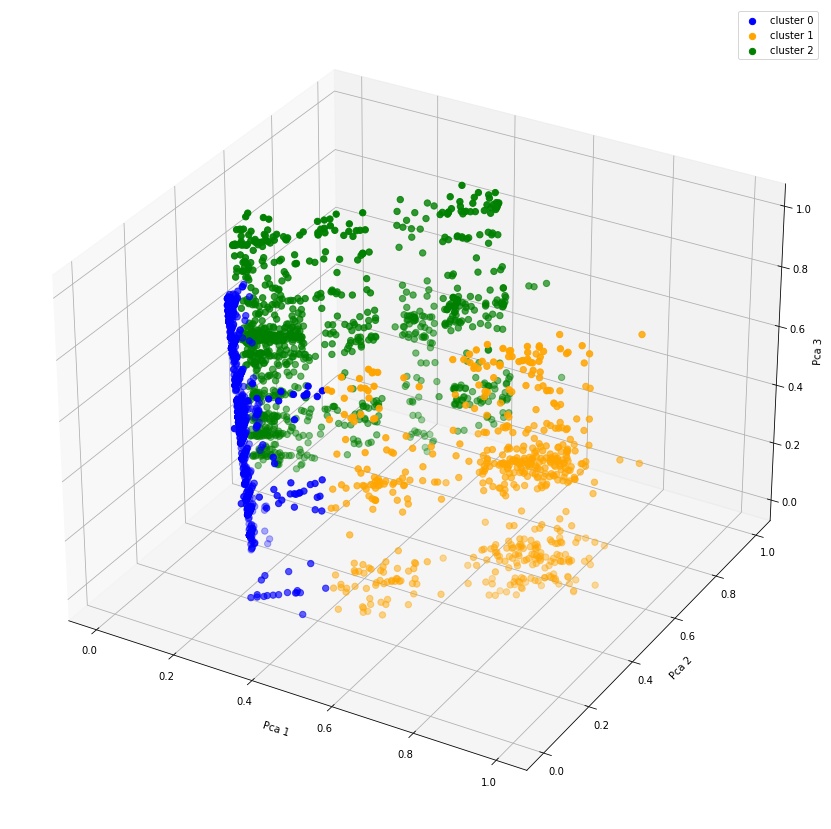

In [78]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_3d[y_clusters == 0,0],results_3d[y_clusters == 0,1],results_3d[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(results_3d[y_clusters == 1,0],results_3d[y_clusters == 1,1],results_3d[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(results_3d[y_clusters == 2,0],results_3d[y_clusters == 2,1],results_3d[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('Pca 1')
ax.set_ylabel('Pca 2')
ax.set_zlabel('Pca 3')
ax.legend()
plt.show()

In [80]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Pca 1'),yaxis = dict(title  = 'Pca 2'),zaxis = dict(title  = 'Pca 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=results_3d[:, 0], y=results_3d[:, 1], z=results_3d[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width =1)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## Adding clusters column to existing user profile

In [82]:
user_profile["Cluster"] = y_clusters

In [83]:
user_profile

,Unnamed: 0,event_source.hash,ONNET_OUTGOING_Categorical,ONNET_OUTGOING_Scaled,ONNET_OUTGOING_Outlier,ONNET_INCOMING_Categorical,ONNET_INCOMING_Scaled,ONNET_INCOMING_Outlier,OFFNET_OUTGOING_Categorical,OFFNET_OUTGOING_Scaled,...,OFFNET_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical,Play_Type,Play_Usage,Voice_Packages,Other_Packages,Household_Types,Having_Insurance,Cluster
0,0,00221451f705ebe26051158bb14f567a,LOW,0.009321,NO,LOW,0.017514,NO,LOW,0.048813,...,LOW,NO,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0
1,1,002fb47f60400713c854b0f69ff78c0a,LOW,0.051339,NO,LOW,0.056319,NO,LOW,0.053424,...,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0
2,2,00567a4a3c474aca1ce5cd6570648932,LOW,0.002404,NO,LOW,0.001374,NO,LOW,0.003606,...,LOW,NO,LOW,TRIPLE_PLAY,"['VOICE_LOW', 'BB_MEDIUM', 'TV_MEDIUM']",NO,NO,NO,NO,1
3,3,00724ae2470df1ed0fe919800d02517d,LOW,0.003140,NO,LOW,0.002747,NO,LOW,0.004808,...,LOW,NO,LOW,DOUBLE_PLAY,"['VOICE_LOW', 'BB_LOW', 'TV_NO']",NO,NO,NO,NO,2
4,4,007400db8afa996e788d23986739f3db,LOW,0.025755,NO,LOW,0.017857,NO,LOW,0.039197,...,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,3302,ffb4fa6778bc5b3d9c858f5f4fa1e0c2,LOW,0.053964,NO,MEDIUM,0.080529,NO,LOW,0.018029,...,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0
3303,3303,ffb63ff99cf1354dff1da862f379da80,MEDIUM,0.227924,NO,MEDIUM,0.173935,NO,HIGH,0.334012,...,HIGH,NO,MEDIUM,SINGLE_PLAY,"['VOICE_MEDIUM', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0
3304,3304,ffd697d66cc01c8897ce3e37d693673a,LOW,0.002943,NO,LOW,0.005495,NO,LOW,0.001202,...,LOW,NO,LOW,DOUBLE_PLAY,"['VOICE_LOW', 'BB_LOW', 'TV_NO']",NO,NO,NO,NO,2
3305,3305,ffd96f173d6cd683bf3384bdc2f99713,MEDIUM,0.213108,NO,MEDIUM,0.203984,NO,MEDIUM,0.196281,...,MEDIUM,MEDIUM,MEDIUM,SINGLE_PLAY,"['VOICE_MEDIUM', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0


In [85]:
user_profile.to_csv("data/user_profile/prepared/User_Profile_Clustered_with_categorical.csv")